In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

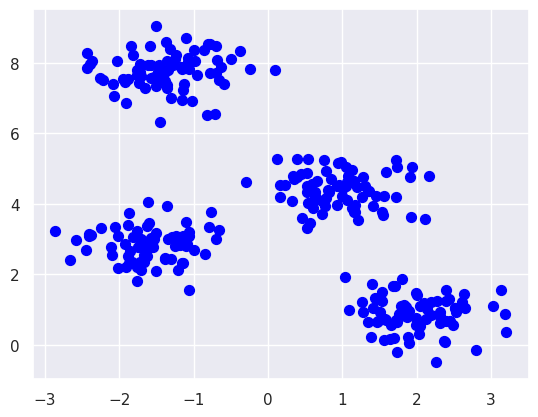

In [ ]:
from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4, cluster_std=0.50,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50,color='blue');

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)

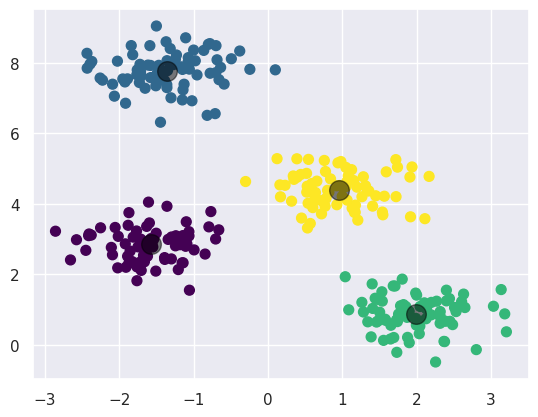

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);

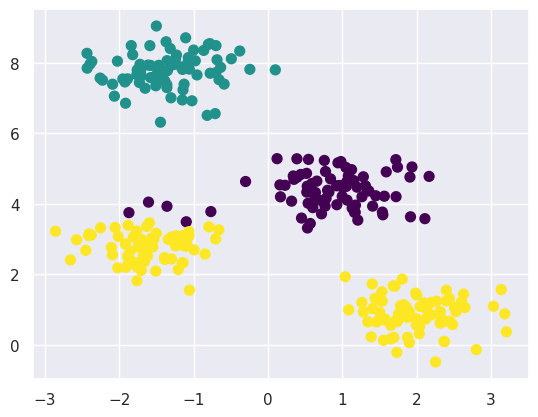

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters,rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    while True:
        labels = pairwise_distances_argmin(x, centers)
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers,labels=find_clusters(x,3)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

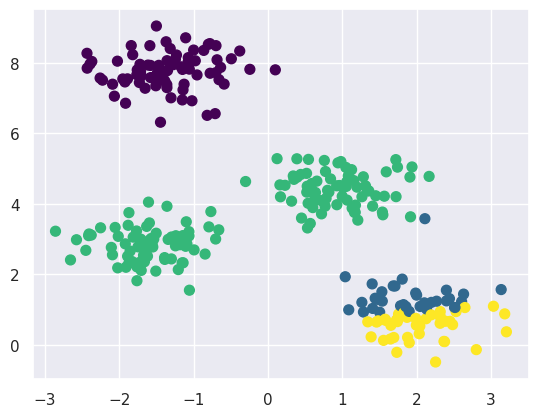

In [ ]:
centers,labels=find_clusters(x,4,rseed=0)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

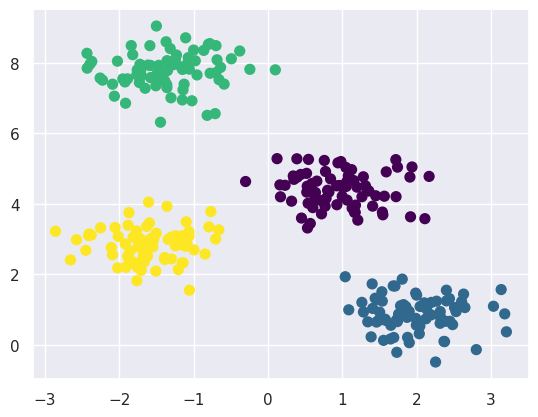

In [ ]:
labels=KMeans(4,random_state=0,n_init=10).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

In [ ]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=0)

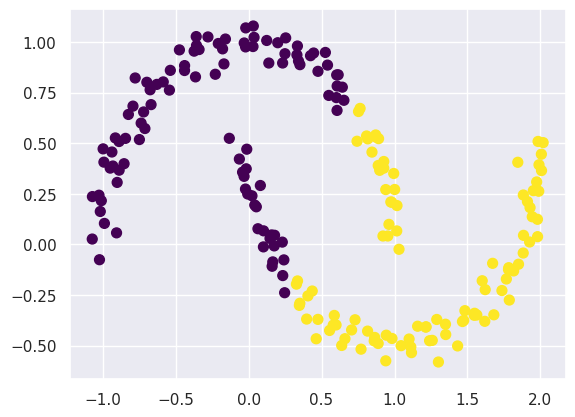

In [ ]:
labels=KMeans(2,random_state=0,n_init=10).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


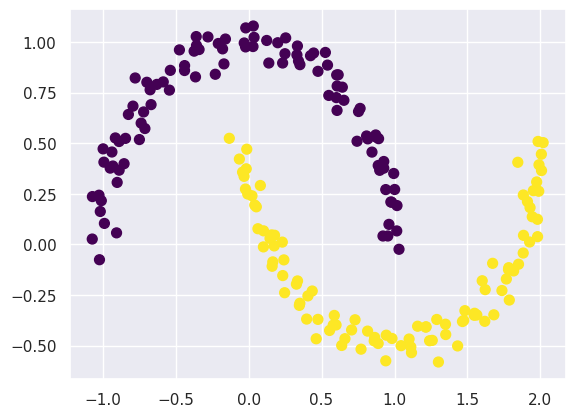

In [ ]:
from sklearn.cluster import SpectralClustering
model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels=model.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

In [ ]:
from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.7,random_state=0)
x=x[:,0:2]

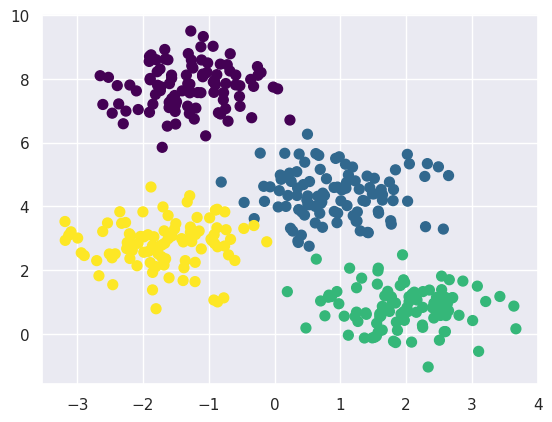

In [ ]:
from sklearn.cluster import KMeans
KMeans=KMeans(4,random_state=0,n_init=10)
labels=KMeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
def plot_kmeans(kmeans,x,n_clusters=4,rseed=0,ax=None):
  labels=kmeans.fit_predict(x)
  ax=ax or plt.gca()
  ax.axis('equal')
  ax.scatter(x[:,0],x[:,1],c=labels, s=50,cmap='viridis',edgecolor='k',zorder=2)
  centers=kmeans.cluster_centers_
  radii=[cdist(x[labels==i],[center]).max()for i,center in enumerate(centers)]
  for c,r in zip(centers,radii):
    ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=3,alpha=0.5,zorder=1))

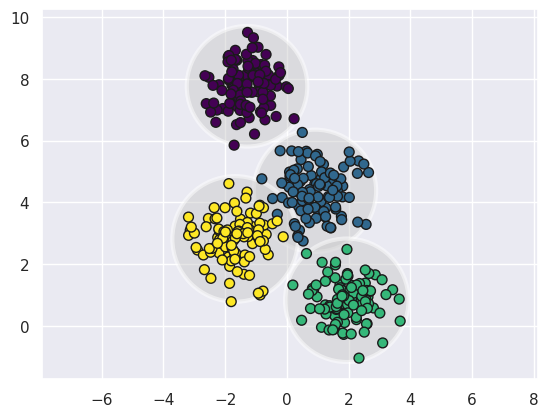

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0,n_init=10)
plot_kmeans(kmeans,x)

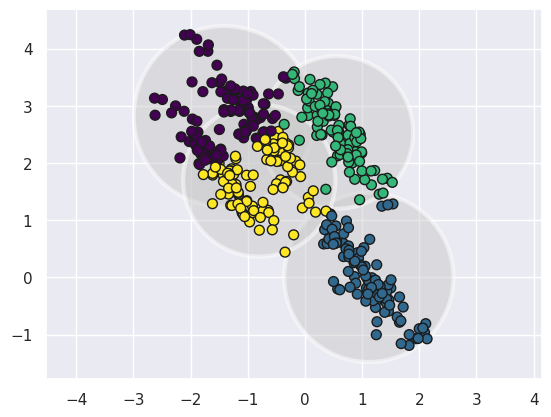

In [ ]:
rng =np.random.RandomState(13)
x_stretched=np.dot(x,rng.randn(2,2))
kmeans=KMeans(n_clusters=4,random_state=0,n_init=10)
plot_kmeans(kmeans,x_stretched)

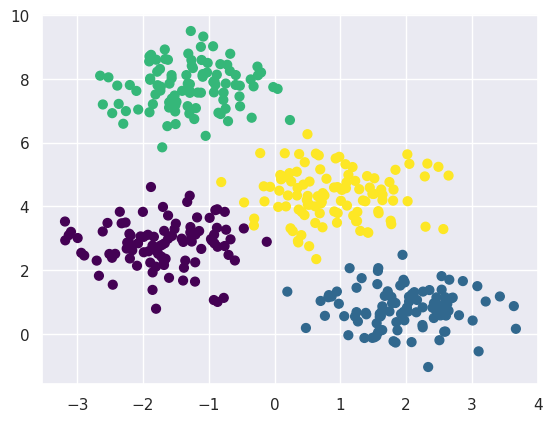

In [ ]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4).fit(x)
labels=gmm.predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=40,cmap='viridis');

In [ ]:
probs=gmm.predict_proba(x)
print(probs[:5].round(3))

[[0.    0.    0.022 0.978]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.001 0.    0.    0.999]
 [1.    0.    0.    0.   ]]


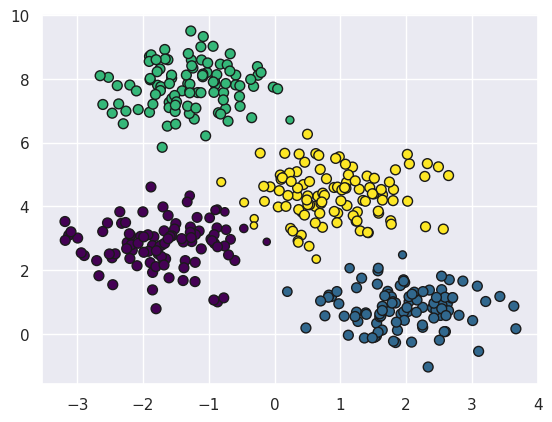

In [ ]:
size=probs.max(1)/0.02
plt.scatter(x[:,0],x[:,1],c=labels,edgecolor='k',cmap='viridis',s=size);